In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2 as cv
from PIL import Image
from google.colab.patches import cv2_imshow
import seaborn as sb

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pathlib
import pandas as pd


from skimage.io import imread
from skimage.transform import resize

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = '/content/drive/MyDrive/DS102_Final/Dataset/train_set'
val_dir = '/content/drive/MyDrive/DS102_Final/Dataset/val_set'

In [4]:
final_test_dir = '/content/drive/MyDrive/DS102_Final/Dataset/Final_Test_Dataset'

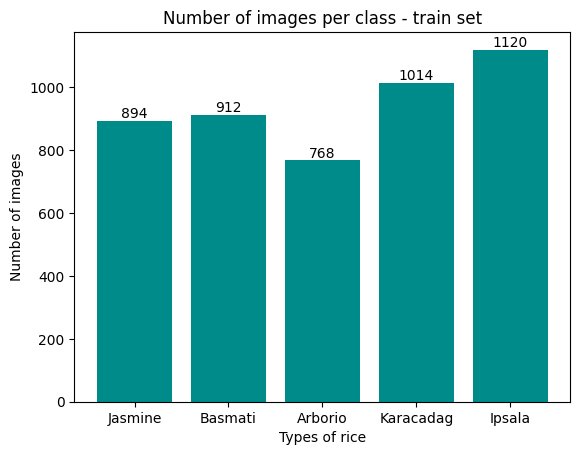

In [5]:
c = []
l = []
for folder in os.listdir(train_dir):
        folder_path = os.path.join(train_dir, folder)
        image_count = len([f for f in os.listdir(folder_path)])
        c.append(folder)
        l.append(image_count)

bars = plt.bar(c, l, color='darkcyan')

# Điền số lên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.bar(c, l, color='darkcyan')
plt.xlabel('Types of rice')
plt.ylabel('Number of images')
plt.title('Number of images per class - train set')
plt.show()

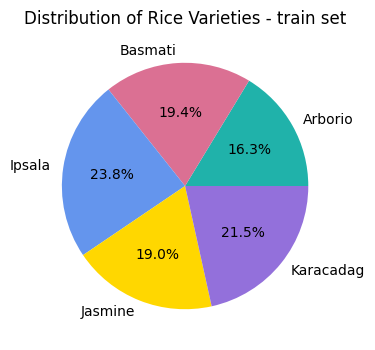

In [6]:
total = 4708

Arborio = 768
Basmati = 912
Ipsala = 1120
Jasmine = 894
Karacadag = 1014

plt.figure(figsize = (6,4))
plt.pie([Arborio, Basmati, Ipsala, Jasmine, Karacadag], labels=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'], colors = ['lightseagreen','palevioletred','cornflowerblue', 'gold', 'mediumpurple'], autopct="%1.1f%%")
plt.title("Distribution of Rice Varieties - train set")

plt.show()

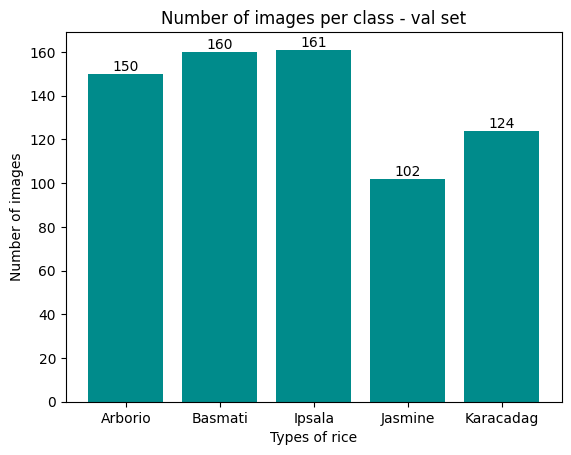

In [7]:
c = []
l = []
for folder in os.listdir(val_dir):
        folder_path = os.path.join(val_dir, folder)
        image_count = len([f for f in os.listdir(folder_path)])
        c.append(folder)
        l.append(image_count)

bars = plt.bar(c, l, color='darkcyan')

# Điền số lên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.bar(c, l, color='darkcyan')
plt.xlabel('Types of rice')
plt.ylabel('Number of images')
plt.title('Number of images per class - val set')
plt.show()

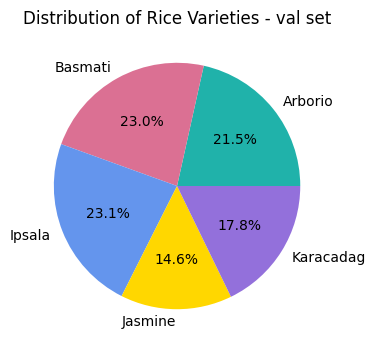

In [8]:
total = 697

Arborio = 150
Basmati = 160
Ipsala = 161
Jasmine = 102
Karacadag = 124

plt.figure(figsize = (6,4))
plt.pie([Arborio, Basmati, Ipsala, Jasmine, Karacadag], labels=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'], colors = ['lightseagreen','palevioletred','cornflowerblue', 'gold', 'mediumpurple'], autopct="%1.1f%%")
plt.title("Distribution of Rice Varieties - val set")

plt.show()

Label: Jasmine


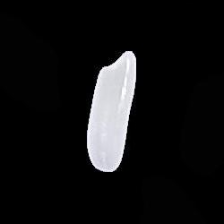



Label: Basmati


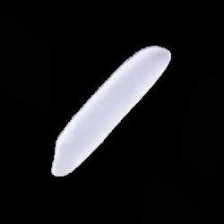



Label: Arborio


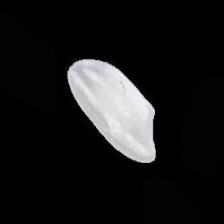



Label: Karacadag


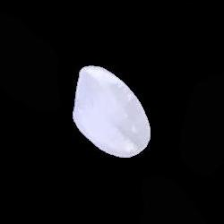



Label: Ipsala


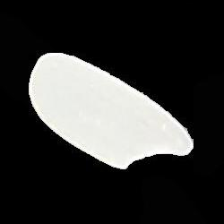

In [9]:
# Trong tập train in mỗi lớp một ảnh đại diện
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)

    img_name = os.listdir(folder_path)[0]
    img_path = os.path.join(folder_path, img_name)

    img = cv.imread(img_path)
    img = cv.resize(img, (224, 224))
    print("Label:", folder)

    cv2_imshow(img)
    print("\n")

In [10]:
# prepare data
categories = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [11]:
def read_img(data_dir):
      data = []
      labels = []
      images = []
      for category_idx, category in enumerate(categories):
          for img_name in os.listdir(os.path.join(data_dir, category)):
              img_path = os.path.join(data_dir, category, img_name)

              img = imread(img_path)
              images.append(img)
              img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Chuyển ảnh sang ảnh xám
              img = cv.resize(img, (128, 128))  # Resize tất cả ảnh về kích thước 128x128
              img = img.flatten()

              data.append(img)
              labels.append(category_idx)

      data = np.asarray(data)
      labels = np.asarray(labels)

      return data, labels, images

In [12]:
def idx_to_str(label):
    label_dict = {0:'Arborio', 1:'Basmati', 2:'Ipsala', 3:'Jasmine', 4:'Karacadag'}

    class_name = label_dict.get(label)
    return class_name

In [13]:
def str_to_idx(class_name):
    label_dict = {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

    label = label_dict.get(class_name, None)
    return label

In [14]:
def result_img(pred_label):
  num_images_to_display = 5
  indices_to_display = np.random.choice(len(y_val), num_images_to_display, replace=False)

  for i in indices_to_display:
      predicted_label = idx_to_str(pred_label[i])
      true_label = idx_to_str(y_val[i])

      plt.figure(figsize=(3, 3))
      plt.imshow(img_val[i])
      plt.title(f"Predicted: {predicted_label}\nActual: {true_label}")
      plt.show()

In [15]:
X_train, y_train, img_train = read_img(train_dir)
X_val, y_val, img_val = read_img(val_dir)

# Chuẩn hóa hình ảnh:

In [16]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

# SVM:

In [17]:
svm_model = SVC(C=1.0, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [18]:
svm_y_pred = svm_model.predict(X_val)

accuracy = accuracy_score(y_val, svm_y_pred)
print(classification_report(y_val, svm_y_pred))
print("Accuracy of SVM:", accuracy)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       150
           1       1.00      0.94      0.97       160
           2       0.96      0.99      0.98       161
           3       0.98      1.00      0.99       102
           4       0.93      0.99      0.96       124

    accuracy                           0.97       697
   macro avg       0.97      0.97      0.97       697
weighted avg       0.97      0.97      0.97       697

Accuracy of SVM: 0.9713055954088953


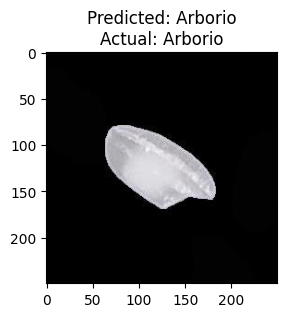

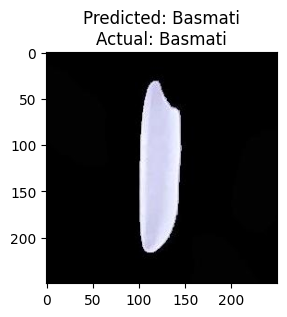

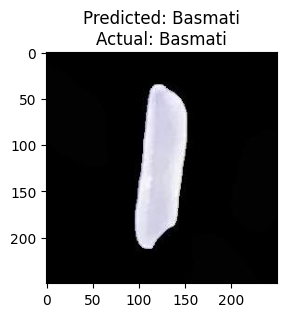

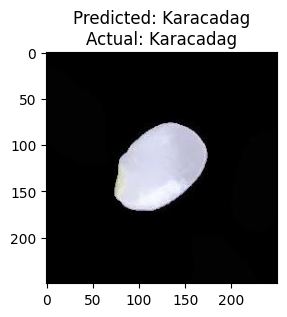

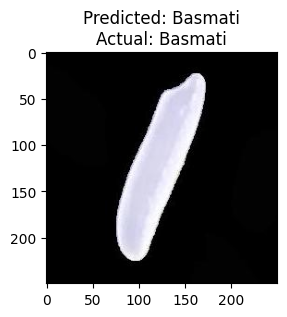

In [19]:
result_img(svm_y_pred)

#KNN:

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [21]:
knn_y_pred = knn_model.predict(X_val)

accuracy = accuracy_score(y_val, knn_y_pred)
print(classification_report(y_val, knn_y_pred))
print("Accuracy of KNN:", accuracy)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       150
           1       1.00      0.99      0.99       160
           2       1.00      0.99      1.00       161
           3       0.98      1.00      0.99       102
           4       0.89      1.00      0.94       124

    accuracy                           0.97       697
   macro avg       0.97      0.98      0.97       697
weighted avg       0.98      0.97      0.97       697

Accuracy of KNN: 0.9741750358680057


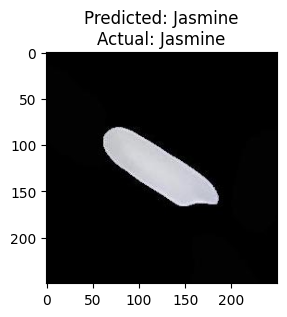

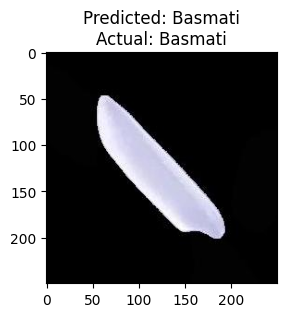

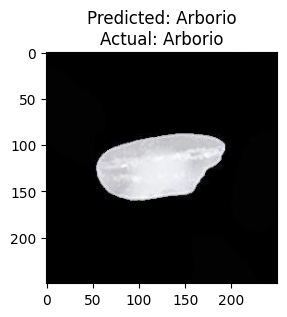

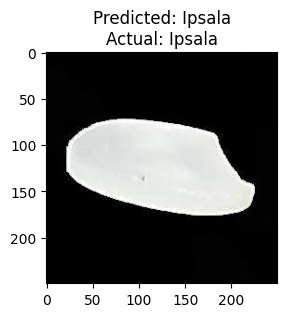

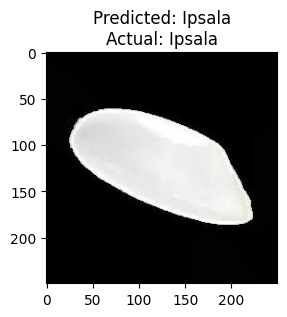

In [22]:
result_img(knn_y_pred)

# Random Forest:

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [24]:
rf_y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, rf_y_pred)
print(classification_report(y_val, rf_y_pred))
print("Accuracy of RF:", accuracy)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       150
           1       0.99      1.00      1.00       160
           2       1.00      0.99      1.00       161
           3       0.95      0.99      0.97       102
           4       0.91      0.98      0.95       124

    accuracy                           0.97       697
   macro avg       0.97      0.97      0.97       697
weighted avg       0.97      0.97      0.97       697

Accuracy of RF: 0.96987087517934


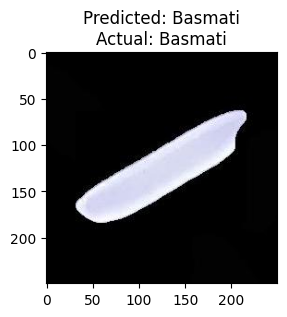

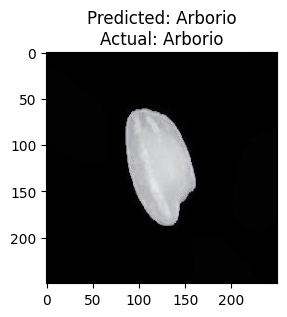

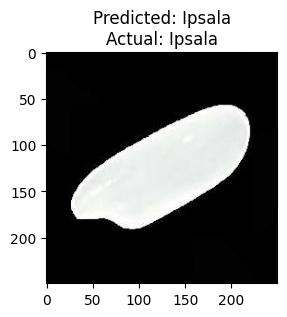

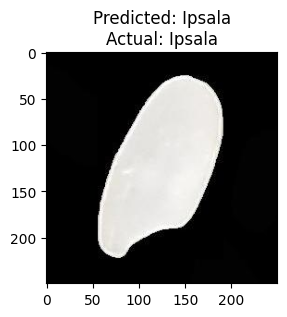

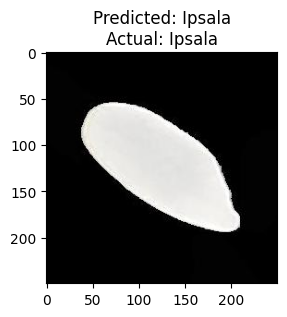

In [25]:
result_img(rf_y_pred)

# CNN:

In [26]:
!pip install tensorflow
!pip install keras

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], 128,128,1))
X_val = np.reshape(X_val, (X_val.shape[0], 128,128,1))

In [29]:
# Creat CNN
cnn_model = tf.keras.models.Sequential()
# Convelotion Operation
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128,128,1)))
# Pooling
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
# Flattening
cnn_model.add(tf.keras.layers.Flatten())
# Full Connection
cnn_model.add(tf.keras.layers.Dense(units=320, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
# Output layers
cnn_model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [30]:
# Training the CNN (set compiler method)
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [31]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 320)               40642880  
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1605      
                                                        

In [32]:
checkpoint_path = '/content/drive/MyDrive/DS102_Final/checkpoints/cnn_model_checkpoint.h5'

checkpoint_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy', mode='max')

In [33]:
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/10
295/295 [==============================] - 309s 1s/step - loss: 0.7328 - accuracy: 0.8596 - val_loss: 0.1469 - val_accuracy: 0.9584
Epoch 2/10
295/295 [==============================] - 312s 1s/step - loss: 0.2285 - accuracy: 0.9350 - val_loss: 0.9730 - val_accuracy: 0.9699
Epoch 3/10
295/295 [==============================] - 294s 996ms/step - loss: 0.1690 - accuracy: 0.9567 - val_loss: 0.1759 - val_accuracy: 0.9598
Epoch 4/10
295/295 [==============================] - 304s 1s/step - loss: 0.1458 - accuracy: 0.9639 - val_loss: 0.1051 - val_accuracy: 0.9656
Epoch 5/10
295/295 [==============================] - 297s 1s/step - loss: 0.1161 - accuracy: 0.9692 - val_loss: 0.0813 - val_accuracy: 0.9785
Epoch 6/10
295/295 [==============================] - 306s 1s/step - loss: 0.0862 - accuracy: 0.9771 - val_loss: 0.1486 - val_accuracy: 0.9699
Epoch 7/10
295/295 [==============================] - 296s 1s/step - loss: 0.1220 - accuracy: 0.9711 - val_loss: 0.2669 - val_accuracy: 0.9

In [34]:
cnn_model.load_weights(checkpoint_path)

In [35]:
# Dự đoán trên tập dữ liệu kiểm thử
predictions = cnn_model.predict(X_val.reshape(-1, 128, 128, 1))

# Chuyển đổi nó thành nhãn dự đoán bằng cách sử dụng np.argmax
predicted_labels = np.argmax(predictions, axis=1)
print('Predicted Labels:\n', predicted_labels)

22/22 [==============================] - 4s 159ms/step
Predicted Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 4 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2

In [36]:
print(classification_report(y_val, predicted_labels))
print(f'Best Accuracy of CNN: {accuracy_score(y_val, predicted_labels)}')

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.99      0.97      0.98       160
           2       0.99      0.99      0.99       161
           3       0.96      0.99      0.98       102
           4       0.94      1.00      0.97       124

    accuracy                           0.98       697
   macro avg       0.98      0.98      0.98       697
weighted avg       0.98      0.98      0.98       697

Best Accuracy of CNN: 0.9784791965566715


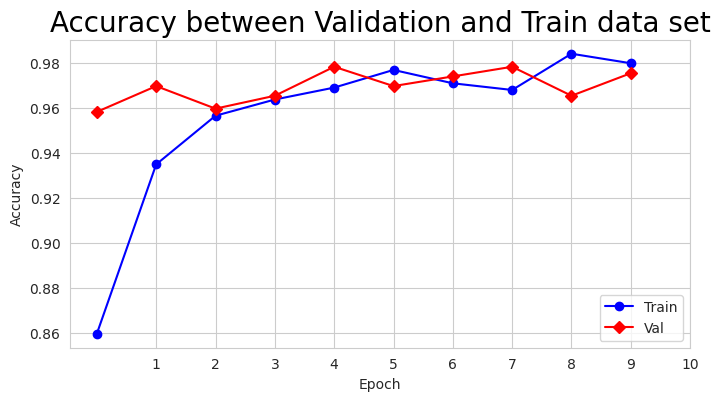

In [37]:
plt.figure(figsize=(8,4))
sb.set_style('whitegrid')
plt.plot(history.history['accuracy'], color='blue', marker="o")
plt.plot(history.history['val_accuracy'],color='red', marker="D")
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.title('Accuracy between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

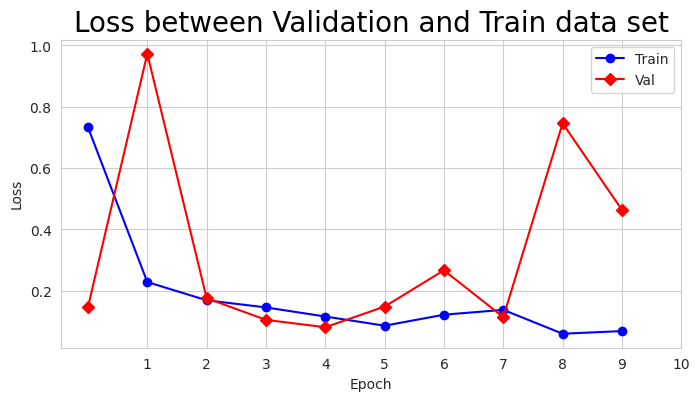

In [38]:
plt.figure(figsize=(8,4))
sb.set_style('whitegrid')
plt.plot(history.history['loss'], color='blue', marker="o")
plt.plot(history.history['val_loss'],color='red', marker="D")
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.title('Loss between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

# Đánh giá trên tập test:

In [39]:
def read_test(folder_path):
    images = []
    data = []
    labels = []
    for filename in os.listdir(folder_path):
          # Đọc ảnh và thêm vào danh sách
          img_path = os.path.join(folder_path, filename)
          img = imread(img_path)
          images.append(img)

          # Gán nhãn theo tên của ảnh
          img_name = os.path.basename(img_path)
          name, extension = os.path.splitext(img_name)
          label = name.split(' ')[0]
          label = str_to_idx(label)

          img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          img = cv.resize(img, (128, 128))
          img = img.flatten()
          data.append(img)
          labels.append(label)

    data = np.asarray(data)
    labels = np.asarray(labels)
    return data, labels, images

In [40]:
X_test, y_test, img_test = read_test(final_test_dir)
X_test = scale.transform(X_test)

#SVM:

In [46]:
svm_y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, svm_y_pred)
print(classification_report(y_test, svm_y_pred))
print("Accuracy of SVM:", accuracy)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       1.00      0.91      0.95        46
           2       0.95      1.00      0.98        40
           3       0.94      1.00      0.97        31
           4       0.95      1.00      0.98        61

    accuracy                           0.97       230
   macro avg       0.97      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230

Accuracy of SVM: 0.9695652173913043


#KNN:

In [42]:
knn_y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, knn_y_pred)
print(classification_report(y_test, knn_y_pred))
print("Accuracy of KNN:", accuracy)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        52
           1       0.98      0.93      0.96        46
           2       1.00      1.00      1.00        40
           3       0.91      0.97      0.94        31
           4       0.88      1.00      0.94        61

    accuracy                           0.95       230
   macro avg       0.95      0.95      0.95       230
weighted avg       0.95      0.95      0.95       230

Accuracy of KNN: 0.9478260869565217


#RF:

In [43]:
rf_y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_y_pred)
print(classification_report(y_test, rf_y_pred))
print("Accuracy of RF:", accuracy)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       1.00      0.98      0.99        46
           2       1.00      1.00      1.00        40
           3       0.97      1.00      0.98        31
           4       0.92      0.97      0.94        61

    accuracy                           0.97       230
   macro avg       0.97      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230

Accuracy of RF: 0.9652173913043478


#CNN:

In [44]:
# Dự đoán trên tập dữ liệu kiểm thử
predictions = cnn_model.predict(X_test.reshape(-1, 128, 128, 1))

# Chuyển đổi nó thành nhãn dự đoán bằng cách sử dụng np.argmax
predicted_labels = np.argmax(predictions, axis=1)
print('Predicted Labels:\n', predicted_labels)

8/8 [==============================] - 1s 147ms/step
Predicted Labels:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0
 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1]


In [45]:
# Tính độ chính xác trên tập test
print(classification_report(y_test, predicted_labels))
print(f'Test Accuracy of CNN: {accuracy_score(y_test, predicted_labels)}')

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.98      0.93      0.96        46
           2       1.00      0.97      0.99        40
           3       0.91      0.97      0.94        31
           4       0.97      0.98      0.98        61

    accuracy                           0.97       230
   macro avg       0.96      0.96      0.96       230
weighted avg       0.97      0.97      0.97       230

Test Accuracy of CNN: 0.9652173913043478
